In [1]:
pip install gym numpy matplotlib

In [2]:
!pip show gym

Name: gym
Version: 0.25.2
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, gym_notices, numpy
Required-by: dopamine_rl


In [3]:
!pip install --upgrade gym


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827626 sha256=f76c7526c6f3cf1bb123706f03068c48086c50e2ee39feac83a16e8591ff0cf2
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [27]:
!pip install pygame --upgrade

In [33]:
import gym
import numpy as np
from collections import defaultdict
import random
from scipy.stats import ks_2samp
env.close()

# Initialize "Taxi-v3" environment
env = gym.make("Taxi-v3", render_mode="ansi")

# Environment details
n_actions = env.action_space.n  # Number of possible actions
observation_space = env.observation_space.n  # Number of discrete states

# Print environment details
print(f"Number of actions: {n_actions}")
print(f"Number of states: {observation_space}")


Number of actions: 6
Number of states: 500


In [29]:
state = env.reset()[0]  # Extract the state from the tuple
next_state = env.step(action)[0]  # Extract the next state from the tuple


In [82]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Epsilon decay rate
episodes = 1000  # Number of episodes

# Initialize Q-table
Q_table = np.zeros((state_space_size, action_space_size))  # Shape: (500, 6)

# Training loop
q_learning_rewards = []
max_steps_per_episode = 1000  # Limit steps per episode

# Training loop
for episode in range(episodes):
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state])

        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        best_next_action = np.argmax(Q_table[next_state])
        Q_table[state, action] += alpha * (
            reward + gamma * Q_table[next_state, best_next_action] - Q_table[state, action]
        )

        state = next_state
        total_reward += reward
        steps += 1  # Increment step counter

    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    q_learning_rewards.append(total_reward)

    # Print progress and average reward every 100 episodes
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(q_learning_rewards[-100:])  # Average reward over the last 100 episodes
        print(f"Episode {episode + 1}/{episodes}: Total Reward = {total_reward}, Average Reward = {avg_reward:.2f}, Epsilon = {epsilon:.4f}")

# Print final average reward
final_avg_reward = np.mean(q_learning_rewards[-100:])
print(f"\nTraining completed. Final Average Reward over the last 100 episodes: {final_avg_reward:.2f}")

Episode 100/1000: Total Reward = -352, Average Reward = -1900.99, Epsilon = 0.6058
Episode 200/1000: Total Reward = -130, Average Reward = -405.67, Epsilon = 0.3670
Episode 300/1000: Total Reward = -71, Average Reward = -166.79, Epsilon = 0.2223
Episode 400/1000: Total Reward = -82, Average Reward = -78.18, Epsilon = 0.1347
Episode 500/1000: Total Reward = -67, Average Reward = -43.37, Epsilon = 0.0816
Episode 600/1000: Total Reward = 1, Average Reward = -21.21, Epsilon = 0.0494
Episode 700/1000: Total Reward = 3, Average Reward = -8.51, Epsilon = 0.0299
Episode 800/1000: Total Reward = 1, Average Reward = -4.86, Epsilon = 0.0181
Episode 900/1000: Total Reward = 10, Average Reward = 0.42, Epsilon = 0.0110
Episode 1000/1000: Total Reward = 2, Average Reward = 2.19, Epsilon = 0.0100

Training completed. Final Average Reward over the last 100 episodes: 2.19


In [235]:
import numpy as np
import random
from collections import defaultdict

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Epsilon decay rate
simulated_updates = 10  # Number of simulated updates
episodes = 1000  # Number of episodes

# Model for simulated experiences
model = defaultdict(lambda: defaultdict(lambda: (None, 0)))  # state -> action -> (next_state, reward)

# Initialize Q-table
dyna_q_table = np.zeros((state_space_size, action_space_size))  # Shape: (500, 6)

# Function to update Q-table
def update_q_table(q_table, state, action, reward, next_state, alpha=0.1, gamma=0.99):
    """Update Q-table using Q-learning update rule."""
    best_next_action = np.argmax(q_table[next_state])
    td_target = reward + gamma * q_table[next_state][best_next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

# Dyna-Q update function
def dyna_q_update(q_table, model, state, action, reward, next_state, simulated_updates=10):
    """Update Q-table and simulate experiences."""
    # Real experience update
    update_q_table(q_table, state, action, reward, next_state)
    # Update model
    model[state][action] = (next_state, reward)
    # Simulated experience updates
    for _ in range(simulated_updates):
        simulated_state = random.choice(list(model.keys()))
        simulated_action = random.choice(list(model[simulated_state].keys()))
        simulated_next_state, simulated_reward = model[simulated_state][simulated_action]
        if simulated_next_state is not None:
            update_q_table(q_table, simulated_state, simulated_action, simulated_reward, simulated_next_state)

# Function for epsilon-greedy action selection
def choose_action(state, q_table, epsilon=0.1):
    """Epsilon-greedy action selection."""
    if random.random() < epsilon:
        return env.action_space.sample()  # Random action
    return np.argmax(q_table[state])  # Best action

# Initialize dictionaries to store real and simulated transitions
real_transitions = defaultdict(list)
simulated_transitions = defaultdict(list)

# Training loop
dyna_q_rewards = []
for episode in range(episodes):
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False

    while not terminated:
        # Epsilon-greedy action selection
        action = choose_action(state, dyna_q_table, epsilon)

        # Real transition
        next_state, reward, terminated, _, info = env.step(action)

        # Mark terminated if reward is 20 (goal achieved)
        terminated = terminated or (reward == 20)
        real_transitions[(state, action)].append((next_state, reward, terminated))

        # Dyna-Q update with real and simulated experiences
        dyna_q_update(dyna_q_table, model, state, action, reward, next_state, simulated_updates)

        # Collect simulated transitions
        for _ in range(simulated_updates):
            simulated_state = random.choice(list(model.keys()))
            simulated_action = random.choice(list(model[simulated_state].keys()))
            simulated_next_state, simulated_reward = model[simulated_state][simulated_action]
            simulated_terminated = simulated_reward == 20  # Simulated termination based on reward
            simulated_transitions[(simulated_state, simulated_action)].append((simulated_next_state, simulated_reward, simulated_terminated))

        # Update state
        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # Record total reward for the episode
    dyna_q_rewards.append(total_reward)

    # Print progress every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes}: Total Reward = {total_reward}, Epsilon = {epsilon:.4f}")

# Print final results
print("\nDyna-Q training completed.")
print(f"Average reward over the last 100 episodes: {np.mean(dyna_q_rewards[-100:])}")

# Validate transition counts
print(f"Collected {sum(len(v) for v in real_transitions.values())} real transitions.")
print(f"Collected {sum(len(v) for v in simulated_transitions.values())} simulated transitions.")

# Validate terminal state counts
real_terminal_count = sum(
    1 for transitions in real_transitions.values() for _, _, terminated in transitions if terminated
)
sim_terminal_count = sum(
    1 for transitions in simulated_transitions.values() for _, _, terminated in transitions if terminated
)

print(f"Number of terminal states in real transitions: {real_terminal_count}")
print(f"Number of terminal states in simulated transitions: {sim_terminal_count}")

Episode 100/1000: Total Reward = -32, Epsilon = 0.6058
Episode 200/1000: Total Reward = -2, Epsilon = 0.3670
Episode 300/1000: Total Reward = -26, Epsilon = 0.2223
Episode 400/1000: Total Reward = -5, Epsilon = 0.1347
Episode 500/1000: Total Reward = 6, Epsilon = 0.0816
Episode 600/1000: Total Reward = 6, Epsilon = 0.0494
Episode 700/1000: Total Reward = -7, Epsilon = 0.0299
Episode 800/1000: Total Reward = -5, Epsilon = 0.0181
Episode 900/1000: Total Reward = 7, Epsilon = 0.0110
Episode 1000/1000: Total Reward = 12, Epsilon = 0.0100

Dyna-Q training completed.
Average reward over the last 100 episodes: 7.84
Collected 48201 real transitions.
Collected 482010 simulated transitions.
Number of terminal states in real transitions: 1000
Number of terminal states in simulated transitions: 1334


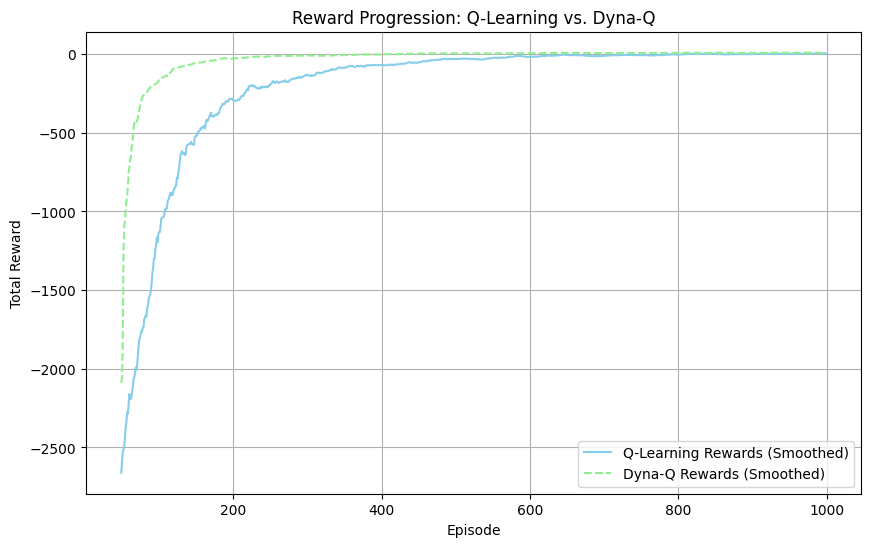

In [92]:
import matplotlib.pyplot as plt
import pandas as pd  # For rolling averages

# Calculate rolling averages
rolling_window = 50  # Adjust this window size as needed
q_learning_rewards_smoothed = pd.Series(q_learning_rewards).rolling(rolling_window).mean()
dyna_q_rewards_smoothed = pd.Series(dyna_q_rewards).rolling(rolling_window).mean()

# Plot the rewards with smoothing
plt.figure(figsize=(10, 6))
plt.plot(q_learning_rewards_smoothed, label='Q-Learning Rewards (Smoothed)', color='skyblue')
plt.plot(dyna_q_rewards_smoothed, label='Dyna-Q Rewards (Smoothed)', linestyle='--', color='lightgreen')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Progression: Q-Learning vs. Dyna-Q')
plt.legend()
plt.grid(True)
plt.show()


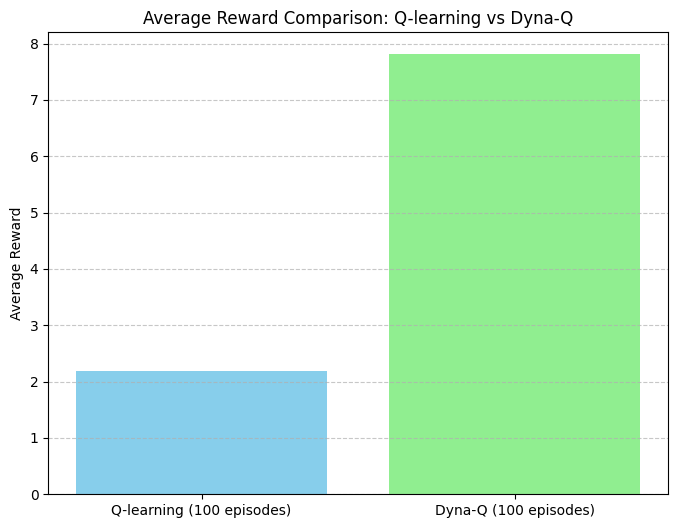

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming q_learning_rewards and dyna_q_rewards are defined
# Calculate average rewards over the last 100 episodes for consistency
avg_q_learning_reward = np.mean(q_learning_rewards[-100:])
avg_dyna_q_reward = np.mean(dyna_q_rewards[-100:])

# Labels and values for the bar graph
labels = ['Q-learning (100 episodes)', 'Dyna-Q (100 episodes)']
values = [avg_q_learning_reward, avg_dyna_q_reward]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.ylabel('Average Reward')
plt.title('Average Reward Comparison: Q-learning vs Dyna-Q')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Reward Mutauion**

In [99]:
# Testing the trained Q-learning agent with mutated rewards
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing

# List to track rewards during testing
testing_rewards = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Use the trained policy (greedy action selection)
        action = np.argmax(Q_table[state])  # Exploit trained policy

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Mutate the reward
        mutated_reward_value = mutated_reward(reward)

        # Accumulate the total reward with mutated reward
        total_reward += mutated_reward_value
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    testing_rewards.append(total_reward)

# Print testing results
average_testing_reward = np.mean(testing_rewards)
print("\nTesting completed.")
print(f"Average reward over {test_episodes} test episodes (with mutated rewards): {average_testing_reward:.2f}")



Testing completed.
Average reward over 100 test episodes (with mutated rewards): -465.06


In [100]:
# Testing the trained Dyna-Q agent with mutated rewards
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing

# Initialize mutated Dyna-Q rewards list
mutated_dyna_q_test_rewards = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Use the trained policy (greedy action selection)
        action = np.argmax(dyna_q_table[state])  # Exploit trained policy

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Mutate the reward
        mutated_reward_value = mutated_reward(reward)

        # Accumulate the total reward with mutated reward
        total_reward += mutated_reward_value
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    mutated_dyna_q_test_rewards.append(total_reward)

# Print testing results
average_testing_reward = np.mean(mutated_dyna_q_test_rewards)
print("\nTesting completed for Dyna-Q with Mutated Rewards.")
print(f"Average reward over {test_episodes} test episodes (with mutated rewards): {average_testing_reward:.2f}")


Testing completed for Dyna-Q with Mutated Rewards.
Average reward over 100 test episodes (with mutated rewards): 8.82


# **Mutated States**

In [125]:
# State Mutation Function
def mutate_state(state, noise_level=1.1):
    """Introduce noise to the discrete state."""
    noise = int(np.random.normal(0, noise_level * state_space_size))  # Noise scaled to state space
    mutated_state = state + noise
    # Ensure the mutated state stays within valid bounds
    return max(0, min(mutated_state, state_space_size - 1))

In [126]:
# Testing the trained Q-learning agent with mutated states
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing

# List to track rewards during testing
q_learning_testing_rewards_state_mutation = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Mutate the state for robustness testing
        mutated_state = mutate_state(state, noise_level=1.1)

        # Use the trained policy (greedy action selection) on the mutated state
        action = np.argmax(Q_table[mutated_state])  # Exploit trained policy

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Accumulate the total reward
        total_reward += reward
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    q_learning_testing_rewards_state_mutation.append(total_reward)

# Print testing results for Q-learning with state mutation
average_q_learning_reward_state_mutation = np.mean(q_learning_testing_rewards_state_mutation)
print("\nTesting completed for Q-learning with State Mutation.")
print(f"Average reward over {test_episodes} test episodes (with state mutation): {average_q_learning_reward_state_mutation:.2f}")


Testing completed for Q-learning with State Mutation.
Average reward over 100 test episodes (with state mutation): -1087.71


In [127]:
# Testing the trained Q-learning agent with mutated states
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing

# List to track rewards during testing
q_learning_testing_rewards_state_mutation = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Mutate the state for robustness testing
        mutated_state = mutate_state(state, noise_level=1.1)

        # Use the trained policy (greedy action selection) on the mutated state
        action = np.argmax(Q_table[mutated_state])  # Exploit trained policy

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Accumulate the total reward
        total_reward += reward
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    q_learning_testing_rewards_state_mutation.append(total_reward)

# Print testing results for Q-learning with state mutation
average_q_learning_reward_state_mutation = np.mean(q_learning_testing_rewards_state_mutation)
print("\nTesting completed for Q-learning with State Mutation.")
print(f"Average reward over {test_episodes} test episodes (with state mutation): {average_q_learning_reward_state_mutation:.2f}")


Testing completed for Q-learning with State Mutation.
Average reward over 100 test episodes (with state mutation): -1089.37


# **Policy Mutation**

In [155]:
# Policy Mutation Function
def mutate_action(state, q_table, epsilon=0.1):
    """Randomly change the action based on epsilon."""
    if random.random() < epsilon:
        return random.randint(0, action_space_size - 1)  # Random action
    return np.argmax(q_table[state])  # Best action based on current Q-table

In [156]:
# Testing the trained Q-learning agent with policy mutation
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing

# List to track rewards during testing
q_learning_testing_rewards_policy_mutation = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Mutate the policy by selecting actions with epsilon-greedy mutation
        action = mutate_action(state, Q_table, epsilon=0.1)

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Accumulate the total reward
        total_reward += reward
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    q_learning_testing_rewards_policy_mutation.append(total_reward)

# Print testing results for Q-learning with policy mutation
average_q_learning_reward_policy_mutation = np.mean(q_learning_testing_rewards_policy_mutation)
print("\nTesting completed for Q-learning with Policy Mutation.")
print(f"Average reward over {test_episodes} test episodes (with policy mutation): {average_q_learning_reward_policy_mutation:.2f}")


Testing completed for Q-learning with Policy Mutation.
Average reward over 100 test episodes (with policy mutation): -225.30


In [160]:
# Testing the trained Dyna-Q agent with policy mutation
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing

# List to track rewards during testing
dyna_q_testing_rewards_policy_mutation = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Mutate the policy by selecting actions with epsilon-greedy mutation
        action = mutate_action(state, dyna_q_table, epsilon=0.1)

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Accumulate the total reward
        total_reward += reward
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    dyna_q_testing_rewards_policy_mutation.append(total_reward)

# Print testing results for Dyna-Q with policy mutation
average_dyna_q_reward_policy_mutation = np.mean(dyna_q_testing_rewards_policy_mutation)
print("\nTesting completed for Dyna-Q with Policy Mutation.")
print(f"Average reward over {test_episodes} test episodes (with policy mutation): {average_dyna_q_reward_policy_mutation:.2f}")


Testing completed for Dyna-Q with Policy Mutation.
Average reward over 100 test episodes (with policy mutation): 2.18


# **Model Mutation**

In [161]:
# Testing the trained Dyna-Q agent with model mutation
test_episodes = 100  # Number of episodes for testing
max_steps_per_episode = 1000  # Limit steps per episode for testing
mutated_dyna_q_test_rewards_model_mutation = []

for episode in range(test_episodes):
    # Reset the environment and extract the initial state
    state = env.reset() if isinstance(env.reset(), int) else env.reset()[0]
    total_reward = 0
    terminated = False
    steps = 0  # Step counter

    while not terminated and steps < max_steps_per_episode:
        # Use the trained policy (greedy action selection)
        action = np.argmax(dyna_q_table[state])  # Exploit trained policy

        # Take action in the environment
        result = env.step(action)
        next_state = result[0]
        reward = result[1]
        terminated = result[2]

        # Mutate the model after observing the environment's response
        mutate_model(model, state, action, noise_level=0.1)

        # Accumulate the total reward
        total_reward += reward
        steps += 1  # Increment step counter

        # Update state
        state = next_state

    # Record the total reward for this test episode
    mutated_dyna_q_test_rewards_model_mutation.append(total_reward)

# Print testing results for Dyna-Q with model mutation
average_dyna_q_reward_model_mutation = np.mean(mutated_dyna_q_test_rewards_model_mutation)
print("\nTesting completed for Dyna-Q with Model Mutation.")
print(f"Average reward over {test_episodes} test episodes (with model mutation): {average_dyna_q_reward_model_mutation:.2f}")


Testing completed for Dyna-Q with Model Mutation.
Average reward over 100 test episodes (with model mutation): 8.24


# **Mutation Results**

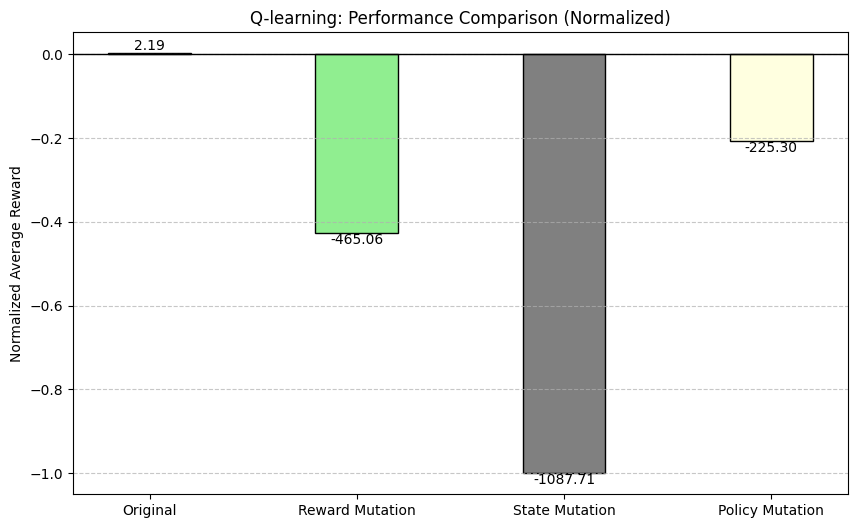

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Example rewards (replace these with your actual results)
q_learning_original = 2.19  # Average reward of original Q-learning
q_learning_reward_mutation = -465.06  # Average reward with reward mutation
q_learning_state_mutation = -1087.71  # Average reward with state mutation
q_learning_policy_mutation = -225.30  # Average reward with policy mutation

# Data for plotting
labels = ["Original", "Reward Mutation", "State Mutation", "Policy Mutation"]
q_learning_rewards = [
    q_learning_original,
    q_learning_reward_mutation,
    q_learning_state_mutation,
    q_learning_policy_mutation,
]

# Normalize rewards for better visualization
max_positive = max(q_learning_rewards)
min_negative = abs(min(q_learning_rewards))
scaling_factor = max(max_positive, min_negative)  # Scale based on max absolute value
normalized_rewards = [x / scaling_factor for x in q_learning_rewards]

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Make bars thinner
colors = ["skyblue", "lightgreen", "gray", "lightyellow"]
bars = plt.bar(labels, normalized_rewards, width=bar_width, color=colors, edgecolor="black")

# Add labels on top of each bar
for bar, value in zip(bars, q_learning_rewards):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}",
        ha="center",
        va="bottom" if bar.get_height() >= 0 else "top",
        fontsize=10
    )

plt.ylabel("Normalized Average Reward")
plt.title("Q-learning: Performance Comparison (Normalized)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.axhline(0, color="black", linewidth=1)  # Highlight the zero line
plt.show()

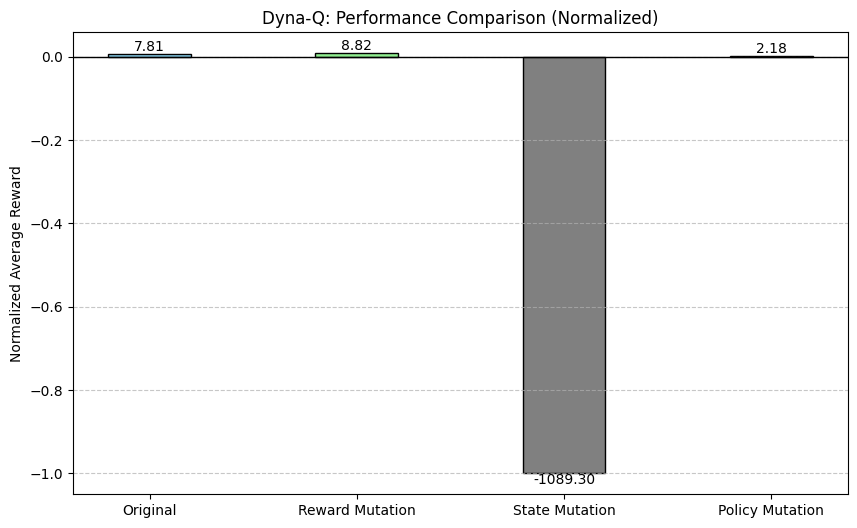

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Example rewards (replace these with your actual results)
dyna_q_original = 7.81  # Average reward of original Dyna-Q
dyna_q_reward_mutation = 8.82  # Average reward with reward mutation
dyna_q_state_mutation = -1089.3  # Average reward with state mutation
dyna_q_policy_mutation = 2.18  # Average reward with policy mutation

# Data for plotting
labels = ["Original", "Reward Mutation", "State Mutation", "Policy Mutation"]
dyna_q_rewards = [
    dyna_q_original,
    dyna_q_reward_mutation,
    dyna_q_state_mutation,
    dyna_q_policy_mutation,
]

# Normalize rewards for better visualization
max_positive = max(dyna_q_rewards)
min_negative = abs(min(dyna_q_rewards))
scaling_factor = max(max_positive, min_negative)  # Scale based on max absolute value
normalized_rewards = [x / scaling_factor for x in dyna_q_rewards]

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Make bars thinner
colors = ["skyblue", "lightgreen", "gray", "lightyellow"]
bars = plt.bar(labels, normalized_rewards, width=bar_width, color=colors, edgecolor="black")

# Add labels on top of each bar
for bar, value in zip(bars, dyna_q_rewards):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}",
        ha="center",
        va="bottom" if bar.get_height() >= 0 else "top",
        fontsize=10
    )

plt.ylabel("Normalized Average Reward")
plt.title("Dyna-Q: Performance Comparison (Normalized)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.axhline(0, color="black", linewidth=1)  # Highlight the zero line
plt.show()

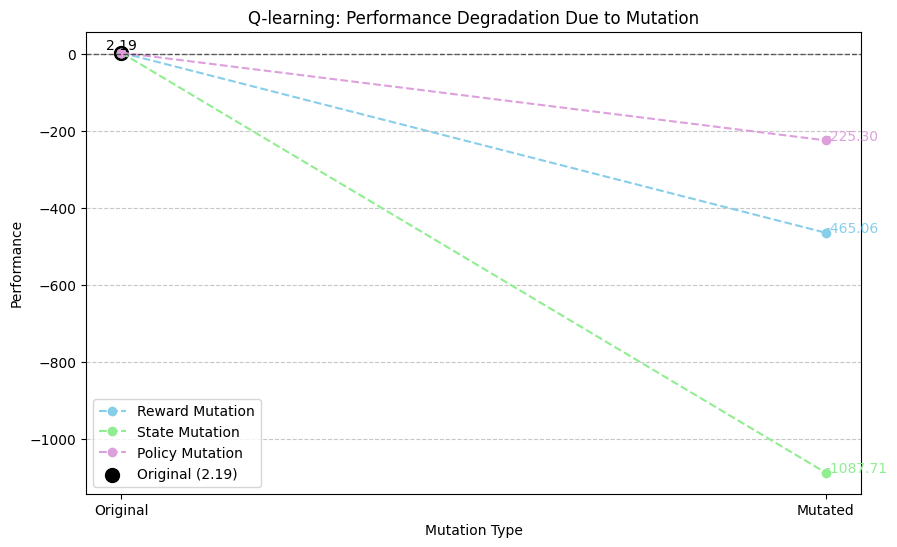

In [173]:
import matplotlib.pyplot as plt

# Q-learning data
q_learning_original = 2.19
q_learning_reward_mutation = -465.06
q_learning_state_mutation = -1087.71
q_learning_policy_mutation = -225.30

# Data for line plots
x = ["Original", "Mutated"]
q_learning_reward_values = [q_learning_original, q_learning_reward_mutation]
q_learning_state_values = [q_learning_original, q_learning_state_mutation]
q_learning_policy_values = [q_learning_original, q_learning_policy_mutation]

# Plot
plt.figure(figsize=(10, 6))

# Plot each mutation as a separate line
plt.plot(x, q_learning_reward_values, marker="o", linestyle="--", color="skyblue", label="Reward Mutation")
plt.plot(x, q_learning_state_values, marker="o", linestyle="--", color="lightgreen", label="State Mutation")
plt.plot(x, q_learning_policy_values, marker="o", linestyle="--", color="plum", label="Policy Mutation")

# Highlight the original performance point with larger marker and label
plt.scatter("Original", q_learning_original, color="black", s=100, label="Original (2.19)")
plt.text(
    "Original", q_learning_original, f"{q_learning_original:.2f}",
    ha="center", va="bottom", fontsize=10, color="black"
)

# Add labels for the mutated values
plt.text("Mutated", q_learning_reward_mutation, f"{q_learning_reward_mutation:.2f}", color="skyblue", ha="left")
plt.text("Mutated", q_learning_state_mutation, f"{q_learning_state_mutation:.2f}", color="lightgreen", ha="left")
plt.text("Mutated", q_learning_policy_mutation, f"{q_learning_policy_mutation:.2f}", color="plum", ha="left")

# Chart details
plt.xlabel("Mutation Type")
plt.ylabel("Performance")
plt.title("Q-learning: Performance Degradation Due to Mutation")
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)  # Zero performance line
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

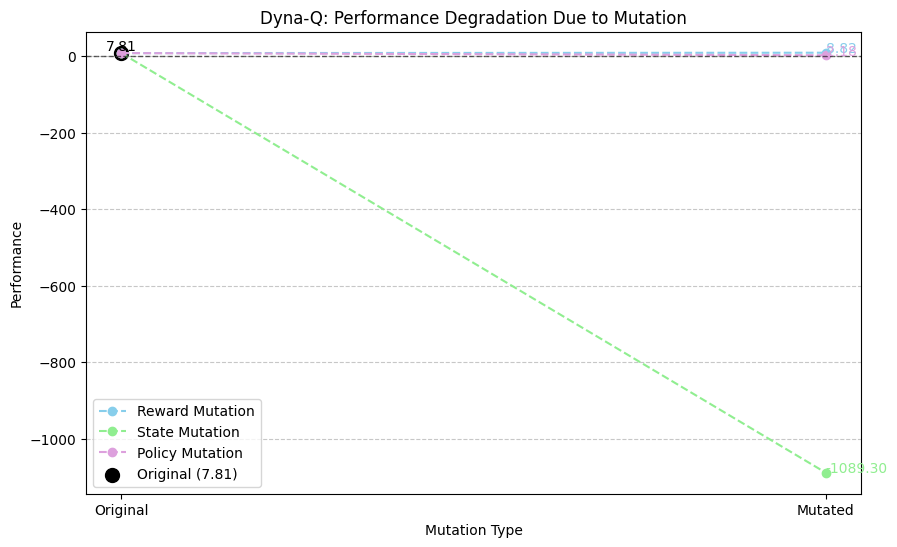

In [174]:
import matplotlib.pyplot as plt

# Dyna-Q data
dyna_q_original = 7.81
dyna_q_reward_mutation = 8.82
dyna_q_state_mutation = -1089.3
dyna_q_policy_mutation = 2.18

# Data for line plots
x = ["Original", "Mutated"]
dyna_q_reward_values = [dyna_q_original, dyna_q_reward_mutation]
dyna_q_state_values = [dyna_q_original, dyna_q_state_mutation]
dyna_q_policy_values = [dyna_q_original, dyna_q_policy_mutation]

# Plot
plt.figure(figsize=(10, 6))

# Plot each mutation as a separate line
plt.plot(x, dyna_q_reward_values, marker="o", linestyle="--", color="skyblue", label="Reward Mutation")
plt.plot(x, dyna_q_state_values, marker="o", linestyle="--", color="lightgreen", label="State Mutation")
plt.plot(x, dyna_q_policy_values, marker="o", linestyle="--", color="plum", label="Policy Mutation")

# Highlight the original performance point with larger marker and label
plt.scatter("Original", dyna_q_original, color="black", s=100, label="Original (7.81)")
plt.text(
    "Original", dyna_q_original, f"{dyna_q_original:.2f}",
    ha="center", va="bottom", fontsize=10, color="black"
)

# Add labels for the mutated values
plt.text("Mutated", dyna_q_reward_mutation, f"{dyna_q_reward_mutation:.2f}", color="skyblue", ha="left")
plt.text("Mutated", dyna_q_state_mutation, f"{dyna_q_state_mutation:.2f}", color="lightgreen", ha="left")
plt.text("Mutated", dyna_q_policy_mutation, f"{dyna_q_policy_mutation:.2f}", color="plum", ha="left")

# Chart details
plt.xlabel("Mutation Type")
plt.ylabel("Performance")
plt.title("Dyna-Q: Performance Degradation Due to Mutation")
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)  # Zero performance line
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

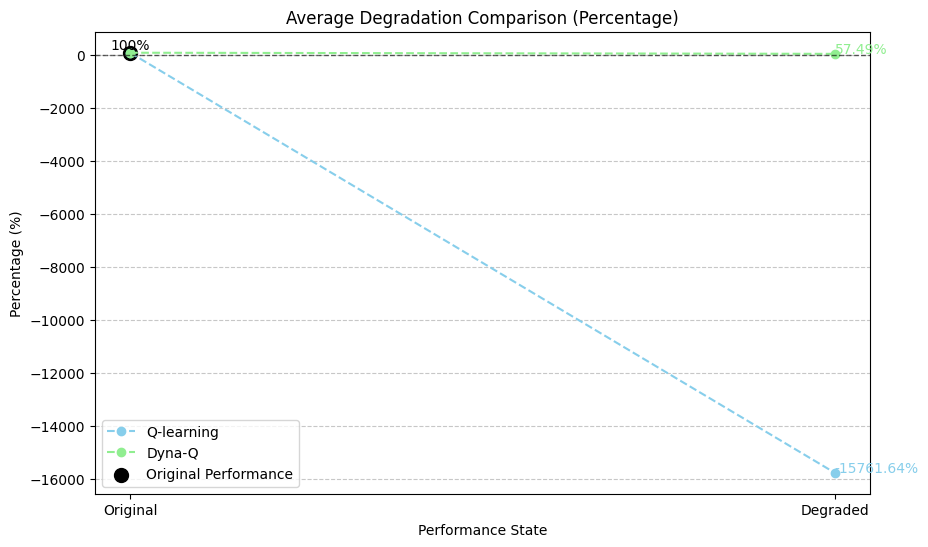

In [175]:
import matplotlib.pyplot as plt

# Data for Q-learning and Dyna-Q
q_learning_original = 2.19
dyna_q_original = 7.81

# Mutation performance for Q-learning
q_learning_reward_mutation = -465.06
q_learning_policy_mutation = -225.30

# Mutation performance for Dyna-Q
dyna_q_reward_mutation = 8.82
dyna_q_policy_mutation = 2.18

# Calculate percentage degradation
q_learning_avg_degradation = np.mean([
    abs((q_learning_original - q_learning_reward_mutation) / q_learning_original * 100),
    abs((q_learning_original - q_learning_policy_mutation) / q_learning_original * 100),
])

dyna_q_avg_degradation = np.mean([
    abs((dyna_q_original - dyna_q_reward_mutation) / dyna_q_original * 100),
    abs((dyna_q_original - dyna_q_policy_mutation) / dyna_q_original * 100),
])

# Data for line plot
x = ["Original", "Degraded"]
q_learning_values = [100, 100 - q_learning_avg_degradation]
dyna_q_values = [100, 100 - dyna_q_avg_degradation]

# Plot
plt.figure(figsize=(10, 6))

# Plot Q-learning and Dyna-Q degradation lines
plt.plot(x, q_learning_values, marker="o", linestyle="--", color="skyblue", label="Q-learning")
plt.plot(x, dyna_q_values, marker="o", linestyle="--", color="lightgreen", label="Dyna-Q")

# Highlight the original performance points with larger markers and labels
plt.scatter("Original", 100, color="black", s=100, label="Original Performance")
plt.text("Original", 100, "100%", ha="center", va="bottom", fontsize=10, color="black")

# Add labels for the degraded percentages
plt.text("Degraded", q_learning_values[1], f"{q_learning_values[1]:.2f}%", color="skyblue", ha="left")
plt.text("Degraded", dyna_q_values[1], f"{dyna_q_values[1]:.2f}%", color="lightgreen", ha="left")

# Chart details
plt.xlabel("Performance State")
plt.ylabel("Percentage (%)")
plt.title("Average Degradation Comparison (Percentage)")
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)  # Zero performance line
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# **KS Test**

In [256]:
from scipy.stats import ks_2samp

# Organize simulated transitions for quick lookup
sim_dict = {}
for sim in simulated_transitions:
    sim_s1, sim_ac, sim_s2 = sim[:3]
    if (sim_s1, sim_ac) not in sim_dict:
        sim_dict[(sim_s1, sim_ac)] = []
    sim_dict[(sim_s1, sim_ac)].append(sim_s2)

# Extract matching state transitions
real_state_diffs = []
sim_state_diffs = []

for real in real_transitions:
    real_s1, real_ac, real_s2 = real[:3]
    if (real_s1, real_ac) in sim_dict:
        for sim_s2 in sim_dict[(real_s1, real_ac)]:
            real_state_diffs.append(real_s2)
            sim_state_diffs.append(sim_s2)

# Perform KS test
stat_transition, p_value_transition = ks_2samp(real_state_diffs, sim_state_diffs)

# Print results
print(f"KS Test for State Transitions: Stat={stat_transition:.4f}, P-value={p_value_transition:.4f}")

KS Test for State Transitions: Stat=0.0000, P-value=1.0000


In [254]:
# Extract terminal flags from real and simulated transitions
real_terminal_flags = [terminated for _, _, terminated in real_transitions]
simulated_terminal_flags = [terminated for _, _, terminated in simulated_transitions]

# Perform KS test for terminal states
real_terminal_flags_numeric = [1 if flag else 0 for flag in real_terminal_flags]
simulated_terminal_flags_numeric = [1 if flag else 0 for flag in simulated_terminal_flags]
stat_terminal, p_value_terminal = ks_2samp(real_terminal_flags_numeric, simulated_terminal_flags_numeric)

# Print results
print(f"KS Test for Terminal States: Stat={stat_terminal:.4f}, P-value={p_value_terminal:.4f}")

KS Test for Terminal States: Stat=0.0046, P-value=0.3024


In [209]:
# Validate real and simulated transitions

# Step 1: Print samples from real and simulated transitions
print("Sample from real transitions:")
for key, value in list(real_transitions.items())[:5]:  # Print first 5 entries
    print(f"Key: {key}, Values: {value[:5]}")  # Print first 5 transitions for each key

print("\nSample from simulated transitions:")
for key, value in list(simulated_transitions.items())[:5]:  # Print first 5 entries
    print(f"Key: {key}, Values: {value[:5]}")  # Print first 5 transitions for each key

# Step 2: Check alignment for the same (state, action) keys
print("\nChecking alignment for (state, action) keys...")
aligned_keys = set(real_transitions.keys()).intersection(set(simulated_transitions.keys()))
print(f"Number of aligned keys: {len(aligned_keys)}")
if len(aligned_keys) > 0:
    sample_key = list(aligned_keys)[0]
    print(f"Sample aligned key: {sample_key}")
    print(f"Real transitions: {real_transitions[sample_key][:5]}")
    print(f"Simulated transitions: {simulated_transitions[sample_key][:5]}")

# Step 3: Compare lengths of real and simulated datasets
total_real_transitions = sum(len(v) for v in real_transitions.values())
total_simulated_transitions = sum(len(v) for v in simulated_transitions.values())
print(f"\nTotal real transitions: {total_real_transitions}")
print(f"Total simulated transitions: {total_simulated_transitions}")

# Step 4: Check diversity of simulated transitions
print("\nChecking diversity of simulated transitions...")
unique_simulated_states = set()
for key, values in simulated_transitions.items():
    for transition in values:
        unique_simulated_states.add(transition[0])  # Add next_state from simulated transitions
print(f"Number of unique simulated states: {len(unique_simulated_states)}")


Sample from real transitions:
Key: (449, 0), Values: [(449, -1), (449, -1), (449, -1), (449, -1), (449, -1)]
Key: (449, 2), Values: [(449, -1), (449, -1), (449, -1), (449, -1), (449, -1)]
Key: (449, 1), Values: [(349, -1), (349, -1), (349, -1), (349, -1), (349, -1)]
Key: (349, 2), Values: [(349, -1), (349, -1), (349, -1), (349, -1), (349, -1)]
Key: (349, 3), Values: [(329, -1), (329, -1), (329, -1), (329, -1)]

Sample from simulated transitions:
Key: (449, 0), Values: [(449, -1), (449, -1), (449, -1), (449, -1), (449, -1)]
Key: (449, 2), Values: [(449, -1), (449, -1), (449, -1), (449, -1), (449, -1)]
Key: (449, 1), Values: [(349, -1), (349, -1), (349, -1), (349, -1), (349, -1)]
Key: (349, 2), Values: [(349, -1), (349, -1), (349, -1), (349, -1), (349, -1)]
Key: (349, 3), Values: [(329, -1), (329, -1), (329, -1), (329, -1), (329, -1)]

Checking alignment for (state, action) keys...
Number of aligned keys: 2397
Sample aligned key: (133, 4)
Real transitions: [(133, -10), (133, -10), (133, 

# **Simulated Enviornment**

In [319]:
# Simulated environment function
def simulated_env(state, action, model):
    """
    Simulate the environment based on the stored model.
    Args:
        state (int): Current state.
        action (int): Action taken by the agent.
        model (dict): Stored simulated experiences.
    Returns:
        next_state (int): Simulated next state.
        reward (float): Simulated reward.
    """
    if state in model and action in model[state]:
        return model[state][action]
    return state, 0  # Default: No transition, no reward

# Function to create a simulated environment
def create_simulated_env(model):
    """
    Create a simulated environment using the stored model.
    Args:
        model (dict): Stored simulated experiences.
    Returns:
        Function: Simulated environment interaction function.
    """
    return lambda state, action: simulated_env(state, action, model)

# Create the simulated environment
sim_env = create_simulated_env(model)
print("Simulated environment created successfully.")

Simulated environment created successfully.


# **Test Dyna-Q on the simulated Environment**

In [402]:
# Test the Dyna-Q agent in the simulated environment
def test_dyna_q_in_simulated_env(sim_env, dyna_q_table, test_episodes=100, max_steps_per_episode=200):
    """
    Test the trained Dyna-Q agent in the simulated environment.
    Args:
        sim_env (function): Simulated environment interaction function.
        dyna_q_table (array): Trained Dyna-Q Q-table.
        test_episodes (int): Number of test episodes.
        max_steps_per_episode (int): Maximum steps per episode.
    Returns:
        float: Average reward over all test episodes.
    """
    simulated_rewards = []  # Store total rewards for each test episode

    for episode in range(test_episodes):
        state = random.choice(list(model.keys()))  # Start from a random state in the model
        total_reward = 0
        steps = 0
        terminated = False

        while not terminated and steps < max_steps_per_episode:
            # Choose action using the trained policy
            action = np.argmax(dyna_q_table[state])

            # Interact with the simulated environment
            next_state, reward = sim_env(state, action)

            # Update state and accumulate reward
            state = next_state
            total_reward += reward
            steps += 1

            # Simulate termination based on heuristic (optional)
            if steps >= max_steps_per_episode:
                terminated = True

        # Record total reward for the episode
        simulated_rewards.append(total_reward)

    # Evaluate the performance
    average_simulated_reward = np.mean(simulated_rewards)
    print(f"Testing Dyna-Q Agent in Simulated Environment:")
    print(f"Average Reward over {test_episodes} episodes: {average_simulated_reward:.2f}")
    return average_simulated_reward

# Test the Dyna-Q agent
test_dyna_q_in_simulated_env(sim_env, dyna_q_table)

Testing Dyna-Q Agent in Simulated Environment:
Average Reward over 100 episodes: 9.26


9.26

In [409]:
def test_agent_with_challenges(agent_table, sim_env, original_env, num_episodes=200, max_steps=500):
    """
    Test the agent in the simulated environment with added challenges.

    Args:
        agent_table: The trained Q-table or policy.
        sim_env: Simulated environment function.
        original_env: The original environment.
        num_episodes: Number of episodes to simulate.
        max_steps: Maximum steps per episode.

    Returns:
        Average reward over all episodes.
    """
    total_rewards = []

    for episode in range(num_episodes):
        # Reset the original environment and extract the initial state
        state_info = original_env.reset()
        state = state_info[0] if isinstance(state_info, tuple) else state_info  # Extract primary state
        state = int(state) if not isinstance(state, int) else state  # Ensure state is an integer

        episode_reward = 0
        terminated = False
        steps = 0

        while not terminated and steps < max_steps:
            # Select action using the agent's policy (greedy)
            action = np.argmax(agent_table[state])

            # Interact with the simulated environment
            next_state, reward = sim_env(state, action)

            # Challenge: Query original environment if reward is 0
            if reward == 0:
                original_env.s = state  # Set the original environment state
                next_state_info = original_env.step(action)
                next_state = next_state_info[0] if isinstance(next_state_info, tuple) else next_state_info
                reward = next_state_info[1]
                terminated = next_state_info[2]
            else:
                # Simulate termination based on reward
                terminated = reward == 20

            # Ensure next_state is an integer for indexing
            next_state = int(next_state) if not isinstance(next_state, int) else next_state

            episode_reward += reward
            state = next_state
            steps += 1

        total_rewards.append(episode_reward)

    avg_reward = np.mean(total_rewards)
    print(f"Testing in Simulated Environment with Challenges: Average Reward over {num_episodes} episodes: {avg_reward:.2f}")
    return avg_reward

# Test the agent in the simulated environment with challenges
test_agent_with_challenges(dyna_q_table, sim_env, env)

Testing in Simulated Environment with Challenges: Average Reward over 200 episodes: 7.67


7.665

In [413]:
def test_agent_with_extreme_challenges(
    agent_table, sim_env, original_env, model, num_episodes=100, max_steps=500, mutation_rate=0.6, no_fallback_rate=0.3
):
    """
    Test the agent in the simulated environment with extreme challenges.
    """
    total_rewards = []
    fallback_count = 0
    mutation_count = 0
    no_fallback_episodes = int(num_episodes * no_fallback_rate)

    for episode in range(num_episodes):
        state_info = original_env.reset()
        state = state_info[0] if isinstance(state_info, tuple) else state_info
        state = int(state) if not isinstance(state, int) else state

        episode_reward = 0
        terminated = False
        steps = 0

        while not terminated and steps < max_steps:
            action = np.argmax(agent_table[state])
            next_state, reward = sim_env(state, action)

            # Apply severe random mutations
            if random.random() < mutation_rate:
                mutation_count += 1
                next_state += random.choice([-3, -2, -1, 1, 2, 3])  # Extreme state perturbation
                reward += np.random.normal(0, 10)  # Larger reward noise
                next_state = max(0, min(next_state, original_env.observation_space.n - 1))

            # For the first no_fallback_episodes, remove fallback entirely
            if episode >= no_fallback_episodes or ((state, action) not in model and random.random() < 0.5):
                fallback_count += 1
                original_env.s = state
                next_state_info = original_env.step(action)
                next_state = next_state_info[0]
                reward = next_state_info[1]
                terminated = next_state_info[2]
            else:
                terminated = reward == 20

            # Penalize zero rewards
            if reward == 0:
                reward = -10
                terminated = True

            next_state = int(next_state) if not isinstance(next_state, int) else next_state
            episode_reward += reward
            state = next_state
            steps += 1

        total_rewards.append(episode_reward)

    avg_reward = np.mean(total_rewards)
    print(f"Testing in Simulated Environment with Extreme Challenges: Average Reward: {avg_reward:.2f}")
    print(f"Total Fallbacks to Original Environment: {fallback_count}")
    print(f"Total Random Mutations Applied: {mutation_count}")
    return avg_reward

# Test with extreme challenges
test_agent_with_extreme_challenges(dyna_q_table, sim_env, env, model)


Testing in Simulated Environment with Extreme Challenges: Average Reward: -2.59
Total Fallbacks to Original Environment: 1428
Total Random Mutations Applied: 1153


-2.587255544297629

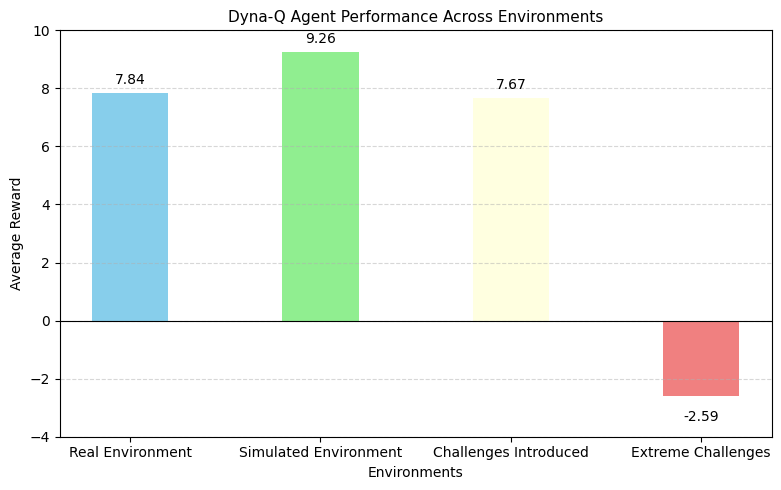

In [434]:
import matplotlib.pyplot as plt

# Performance data
environments = [
    "Real Environment",
    "Simulated Environment",
    "Challenges Introduced",
    "Extreme Challenges"
]
performance = [7.84, 9.26, 7.67, -2.59]

# Colors for the bars
colors = ["skyblue", "lightgreen", "lightyellow", "lightcoral"]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(environments, performance, color=colors, edgecolor="none", width=0.4)

# Adding text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + (0.2 if yval >= 0 else -0.5),
        f"{yval:.2f}",
        ha="center",
        va="bottom" if yval >= 0 else "top",
        fontsize=10
    )

# Customizing axes and title
plt.axhline(0, color="black", linewidth=0.8, linestyle="-")  # Add x-axis at y=0
plt.ylabel("Average Reward", fontsize=10)
plt.xlabel("Environments", fontsize=10)
plt.title("Dyna-Q Agent Performance Across Environments", fontsize=11)
plt.ylim(-4, 10)  # Adjust the range of the y-axis

# Customizing ticks and grid
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()